In [2]:
!pip install psycopg2

In [4]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [12]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)



In [13]:
cur=conn.cursor()

Define the SQL statement

In [18]:
sql_statement = """ select bathroom,bedroom
            from public.house_price_full
            where bathroom>2"""

Cursor executes the SQL state,emt

In [19]:
cur.execute(sql_statement)

In [20]:
cur.fetchone()

(3, 4)

In [22]:
for bathroom,bedroom in cur.fetchall()[:10]:
    print(bathroom,bedroom)

3 4
3 5
3 4
3 4
3 3
3 5
4 5
3 4
3 4
3 4


In [24]:
df=pandas.read_sql_query(sql_statement,conn)
df[:10]

,bathroom,bedroom
0,3,4
1,3,4
2,3,5
3,3,4
4,3,4
5,3,3
6,3,5
7,4,5
8,3,4
9,3,4


Define the query

In [48]:
sql_statement= """
                select house_type,
                avg(price) as avg_price
                from public.house_price_full
                group by house_type
                order by avg_price desc
                """

Visualize Query

<AxesSubplot:xlabel='house_type'>

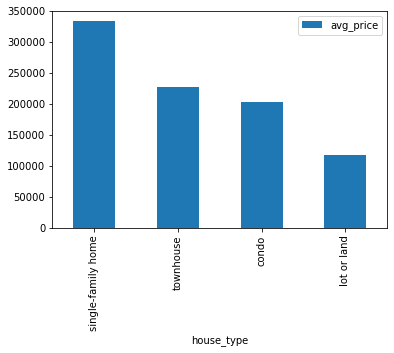

In [49]:
df_price=pandas.read_sql_query(sql_statement,conn)

df_price.plot.bar(y='avg_price',x='house_type')

Define the SQL statement to modify the table using string format to pass the vlause in SQL

In [61]:
sql_statement = """
                insert into demo.student(s_email,s_name,major)
                values('{}','{}','{}')
                                
                """.format('s6@jmu.edu','s5','ia')

print(sql_statement)


                insert into demo.student(s_email,s_name,major)
                values('s6@jmu.edu','s5','ia')
                                
                


Execute the statement

In [62]:
cur.execute(sql_statement)

InternalError: current transaction is aborted, commands ignored until end of transaction block


Rollback the change

In [63]:
conn.rollback()

In [64]:
sql_statement = """
                insert into demo.student(s_email,s_name,major)
                values('{}','{}','{}')
                                
                """.format('s6@jmu.edu','s6','ia')

In [65]:
cur.execute(sql_statement)

In [66]:
conn.commit()

Check the result

In [68]:
df_student=pandas.read_sql_query('select * from demo.student',conn)
df_student[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,m1
1,s2@jmu.edu,s2,m2
2,s3@jmu.edu,s3,m1
3,s4@jmu.edu,s4,m2
4,s5@jmu.edu,s5,ia
5,s6@jmu.edu,s6,ia


In [69]:
cur.close()

In [70]:
conn.close()